# Pandas: Formatos diferentes de entrada e saída (IO)

## Objetivos
* Aprofunde os seus conhecimentos em análise de dados com pandas
* Aprenda a trabalhar com diferentes tipos de dados, tanto na entrada como na saída (input/output)
* Desenvolva análises descritivas dos dados
* Saiba como cruzar os dados de DataFrames diferentes
* Explore os dados de um banco sql com pandas

link: https://cursos.alura.com.br/course/pandas-io

### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import html5lib
import lxml
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, MetaData, Table

### Importando o dataset e explorando os dados

In [3]:
nomes_m = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [5]:
frames = [nomes_m, nomes_f]
nomes = pd.concat(frames)[['nome']]
nomes.sample(5)

,nome
136,KARINA
169,WELLINGTON
161,DAMIAO
0,MARIA
107,ELISANGELA


In [6]:
np.random.seed(123)
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1
nomes.sample(5)

,nome,id_aluno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [27]:
np.random.seed(123)

dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['email'] = nomes.nome + np.random.choice(dominios, size=len(nomes))
nomes.sample(5)

,nome,id_aluno,email
74,LAURA,355,LAURA@servicodoemail.com
25,BEATRIZ,236,BEATRIZ@dominiodoemmail.com.br
190,LURDES,58,LURDES@servicodoemail.com
139,OSMAR,54,OSMAR@dominiodoemmail.com.br
195,ROSANE,231,ROSANE@dominiodoemmail.com.br


## Criando uma tabela de cursos

In [53]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [54]:
type(cursos)

list

In [55]:
cursos = cursos[0]
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [56]:
type(cursos)

pandas.core.frame.DataFrame

## Alterando o index de cursos

In [57]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [58]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [59]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [82]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=len(nomes)) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,email,matriculas
5,JULIANA,11,JULIANA@servicodoemail.com,1
196,ARLINDO,222,ARLINDO@dominiodoemmail.com.br,1
134,VERONICA,245,VERONICA@dominiodoemmail.com.br,1
20,MANOEL,200,MANOEL@dominiodoemmail.com.br,1
43,TEREZINHA,339,TEREZINHA@servicodoemail.com,2


In [83]:
nomes['matriculas'].describe()

count    400.000000
mean       2.132500
std        1.576756
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matriculas, dtype: float64

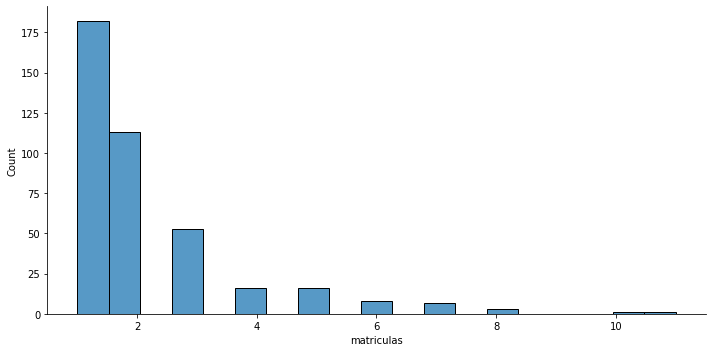

In [84]:
sns.displot(data=nomes['matriculas'], aspect=2)

plt.show()

In [168]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [169]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_as_matriculas, columns=['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,235,10
1,235,11
2,235,3
3,43,13
4,43,14


In [170]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,28,Java para Web
3,18,C# para Web
4,126,Ruby on Rails
5,136,Cursos de Python
...,...,...
16,112,Estatística básica
17,22,Internet das coisas
18,102,Programação funcional


In [171]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [172]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,24,Lógica de programação
1,28,Java para Web
2,18,C# para Web
3,126,Ruby on Rails
4,136,Cursos de Python
...,...,...
15,112,Estatística básica
16,22,Internet das coisas
17,102,Programação funcional
18,49,Boas práticas em Java


In [173]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":24,"2":28,"3":18,"4":126,"5":136,"6":81,"7":88,"8":44,"9":141,"10":90,"11":97,"12":95,"13":120,"14":129,"15":178,"16":112,"17":22,"18":102,"19":49,"20":26},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [174]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>24</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>28</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>18</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>126</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>136</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>81</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>88</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>44</td>\n      <td>Novas integrações com Java</td>

In [175]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>28</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>126</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>136</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>81</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>88</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>44</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>141</t

## Criando o banco SQL

In [176]:
engine = create_engine('sqlite:///:memory:')

In [177]:
engine

Engine(sqlite:///:memory:)

In [178]:
type(engine)

sqlalchemy.engine.base.Engine

In [179]:
matriculas_por_curso.to_sql('matriculas', engine)

In [180]:
print(engine.table_names())

['matriculas']


C:\Users\guilh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


## Buscando do banco SQL

In [181]:
query = 'SELECT * FROM matriculas WHERE quantidade_de_alunos < 20'

In [182]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,18,C# para Web


In [183]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [184]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
3,Ruby on Rails,126
4,Cursos de Python,136
5,PHP com MySql,81
6,.NET para web,88
8,TDD com Java,141
...,...,...
12,Persistência com .NET,120
13,Desenvolvendo jogos,129
14,Análise de dados,178
15,Estatística básica,112


## Escrevendo no banco

In [185]:
muitas_matriculas.to_sql('muitas_matriculas', engine)

In [186]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\guilh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


## Nomes dos alunos da próxima turma

In [187]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,28,Java para Web
3,18,C# para Web
4,126,Ruby on Rails
5,136,Cursos de Python


In [190]:
id_curso = 8
proxima_turma = matriculas.query('id_curso == @id_curso')
proxima_turma

,id_aluno,id_curso
16,343,8
37,185,8
113,193,8
168,273,8
174,372,8
...,...,...
1511,266,8
1599,291,8
1606,119,8
1622,100,8


In [191]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,email,matriculas
id_aluno,,,,
28,8,EVA,EVA@servicodoemail.com,10
28,8,EVA,EVA@servicodoemail.com,10
32,8,JEFERSON,JEFERSON@dominiodoemmail.com.br,1
40,8,JOELMA,JOELMA@servicodoemail.com,1
64,8,PAULA,PAULA@servicodoemail.com,5
...,...,...,...,...
372,8,ADILSON,ADILSON@dominiodoemmail.com.br,2
375,8,CELIO,CELIO@dominiodoemmail.com.br,11
380,8,ARTHUR,ARTHUR@servicodoemail.com,2


In [206]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]
proxima_turma

,nome
id_aluno,
28,EVA
28,EVA
32,JEFERSON
40,JOELMA
64,PAULA
...,...
372,ADILSON
375,CELIO
380,ARTHUR


In [203]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Novas integrações com Java
Name: 8, dtype: object

In [204]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Novas integrações com Java'

In [208]:
proxima_turma = proxima_turma.rename(columns={'nome': 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma.head()

,Alunos do curso de Novas integrações com Java
id_aluno,
28,EVA
28,EVA
32,JEFERSON
40,JOELMA
64,PAULA


## Excel

In [210]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [211]:
pd.read_excel('proxima_turma.xlsx', )

,Alunos do curso de Novas integrações com Java
0,EVA
1,EVA
2,JEFERSON
3,JOELMA
4,PAULA
...,...
39,ADILSON
40,CELIO
41,ARTHUR
42,KELLY
